In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#loading data
train_data = pd.read_csv(r"D:\Documents\ML\train.csv")
test_data = pd.read_csv(r"D:\Documents\ML\test.csv")

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


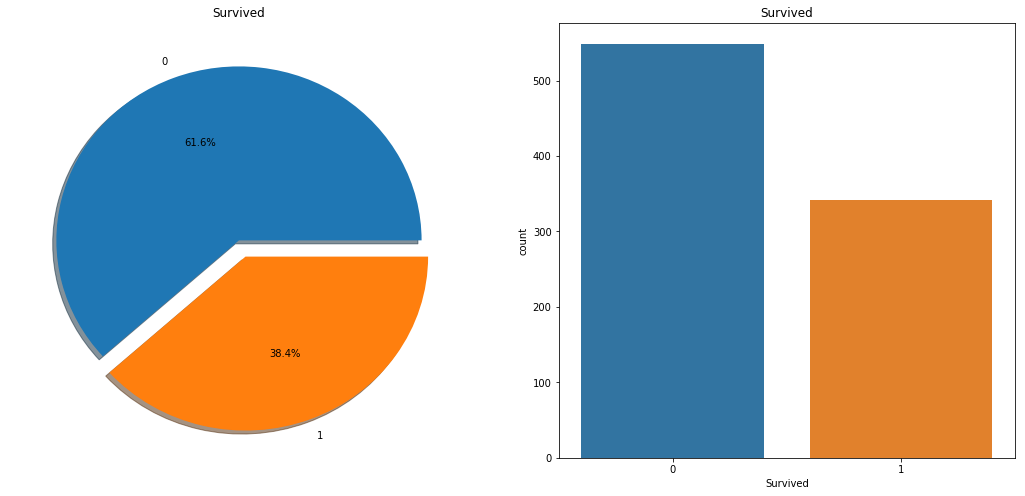

In [7]:
#Visualizing data
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [8]:
#check for null data
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.groupby(["Sex","Survived"])["Survived"].mean()

Sex     Survived
female  0           0
        1           1
male    0           0
        1           1
Name: Survived, dtype: int64

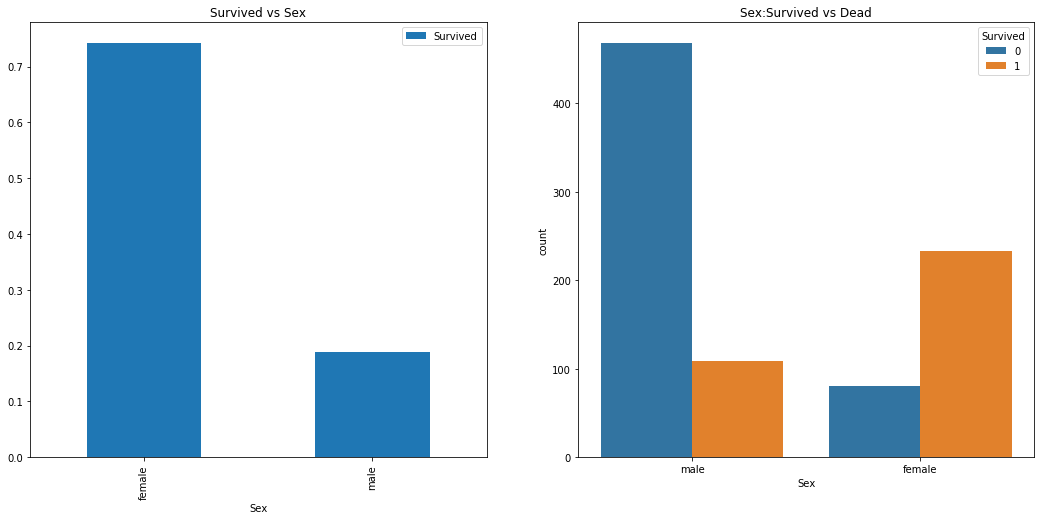

In [10]:
#Sex:survived and dead
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

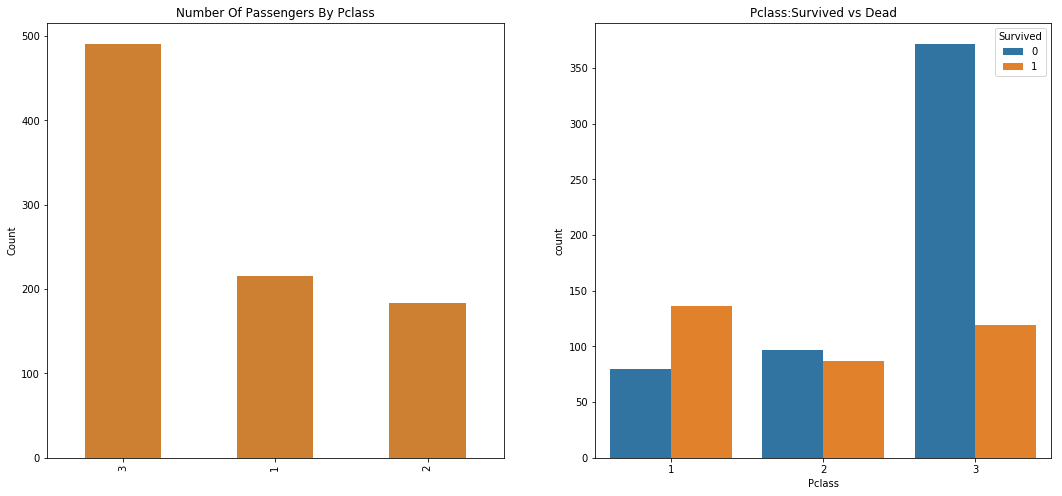

In [11]:
#Class and survived
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [12]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [13]:
pd.crosstab(train_data.Sex,train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


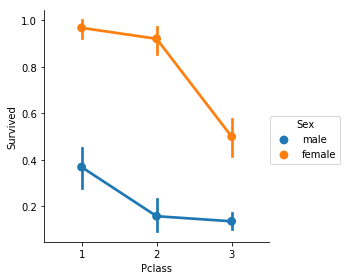

In [14]:
sns.factorplot("Pclass","Survived",hue="Sex",data=train_data)
plt.show()

In [15]:
print("Oldest person is:",train_data['Age'].max(),'Years')
print("Youngest person is:",train_data['Age'].min(),'Years')
print("Average age is:",train_data['Age'].mean(),'Years')

Oldest person is: 80.0 Years
Youngest person is: 0.42 Years
Average age is: 29.69911764705882 Years


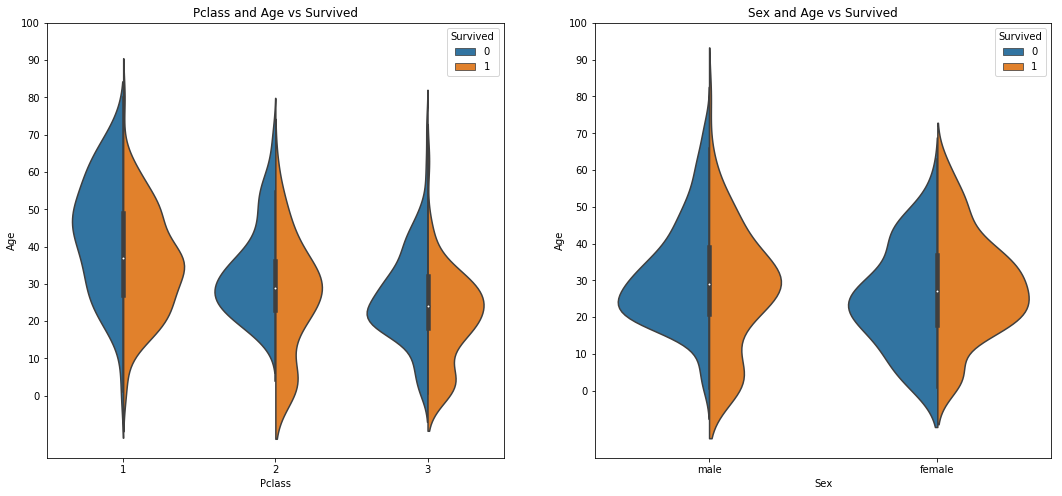

In [16]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=train_data,split=True,ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train_data,split=True,ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

In [20]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.')

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
pd.crosstab(train_data.Initial,train_data.Sex,margins=True).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [24]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [28]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [30]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

In [32]:
train_data.Age.isnull().any()

False

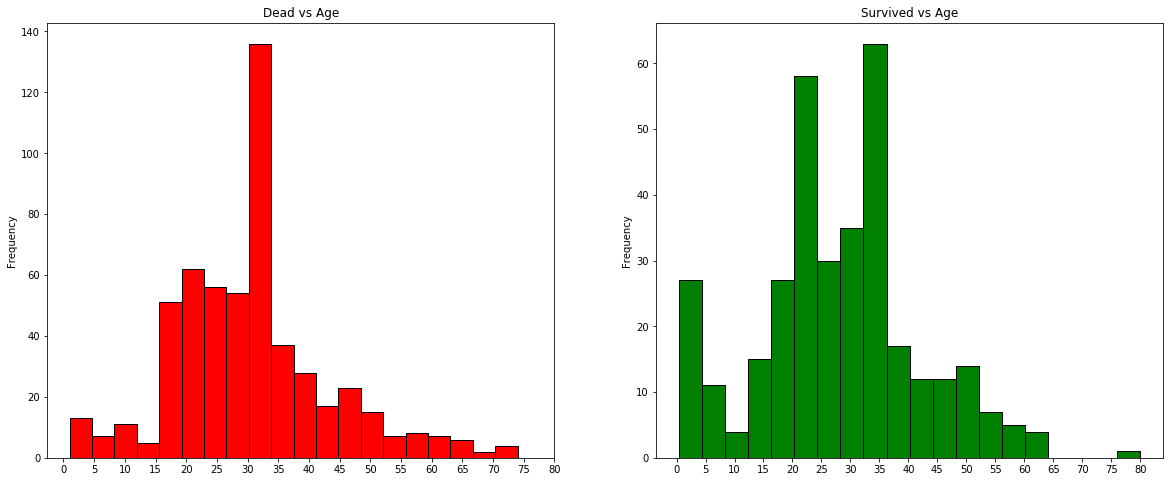

In [37]:
f,ax = plt.subplots(1,2,figsize=(20,8))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title("Dead vs Age")
ax[0].set_xticks(range(0,85,5))
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title("Survived vs Age")
ax[1].set_xticks(range(0,85,5))
plt.show()

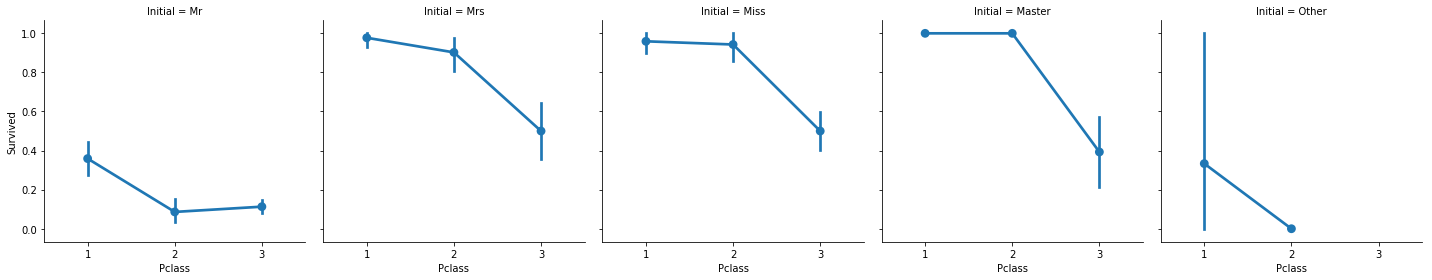

In [40]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_data)
plt.show()

In [41]:
pd.crosstab([train_data.Embarked,train_data.Pclass],[train_data.Sex,train_data.Survived],margins=True).style.background_gradient(cmap='summer_r')

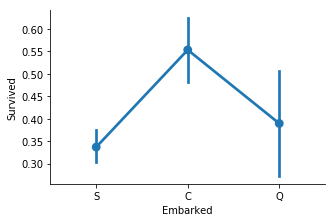

In [47]:
sns.factorplot('Embarked','Survived',data=train_data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

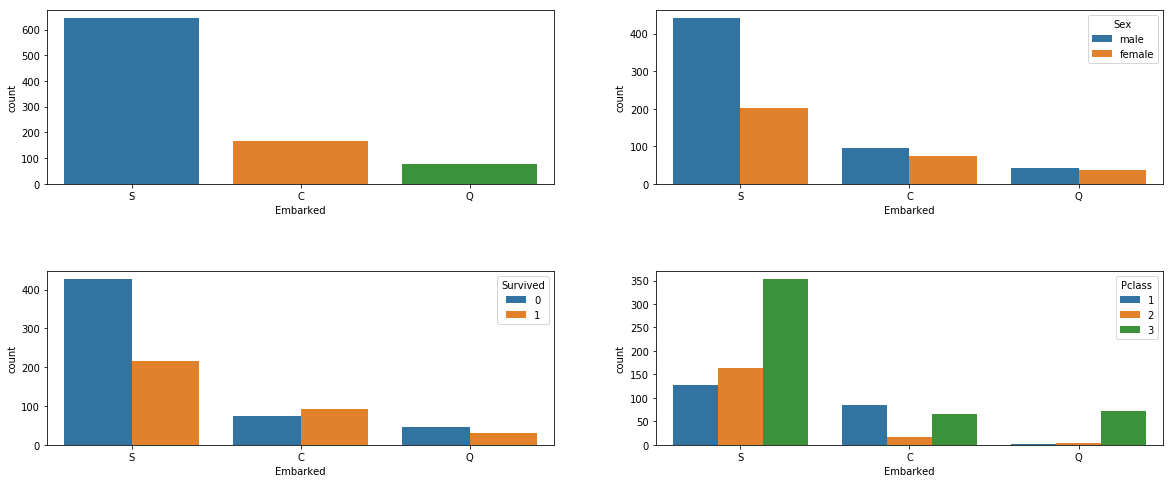

In [50]:
f,ax = plt.subplots(2,2,figsize=(20,8))
sns.countplot('Embarked',data=train_data,ax=ax[0,0])
ax[0,0].set_title="No. of Passengers Boarded"
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[0,1])
ax[0,1].set_title="Male-Female Split for Embarked"
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0])
ax[1,0].set_title="Embarked vs Survived"
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[1,1])
ax[1,1].set_title="Embarked vs Pclass"
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

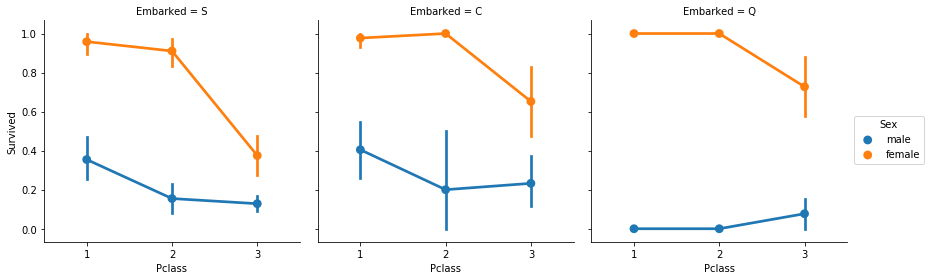

In [52]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data)
plt.show()

In [54]:
train_data['Embarked'].fillna('S',inplace=True)
train_data.Embarked.isnull().any()

False

In [57]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


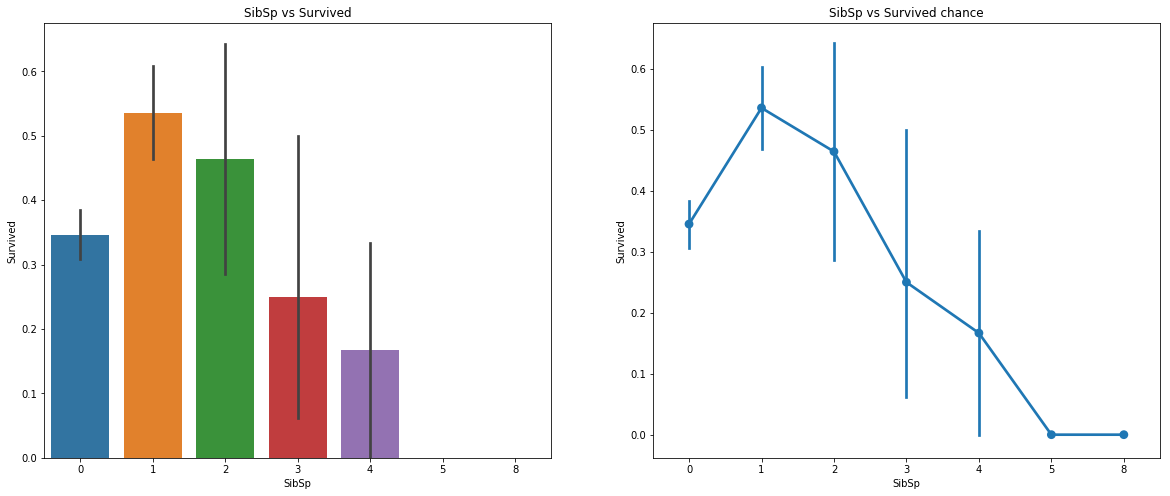

In [61]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived chance')
plt.close(2)
plt.show()

In [62]:
pd.crosstab(train_data.SibSp,train_data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [63]:
pd.crosstab(train_data.Parch,train_data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [65]:
pd.crosstab(train_data.Parch,train_data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


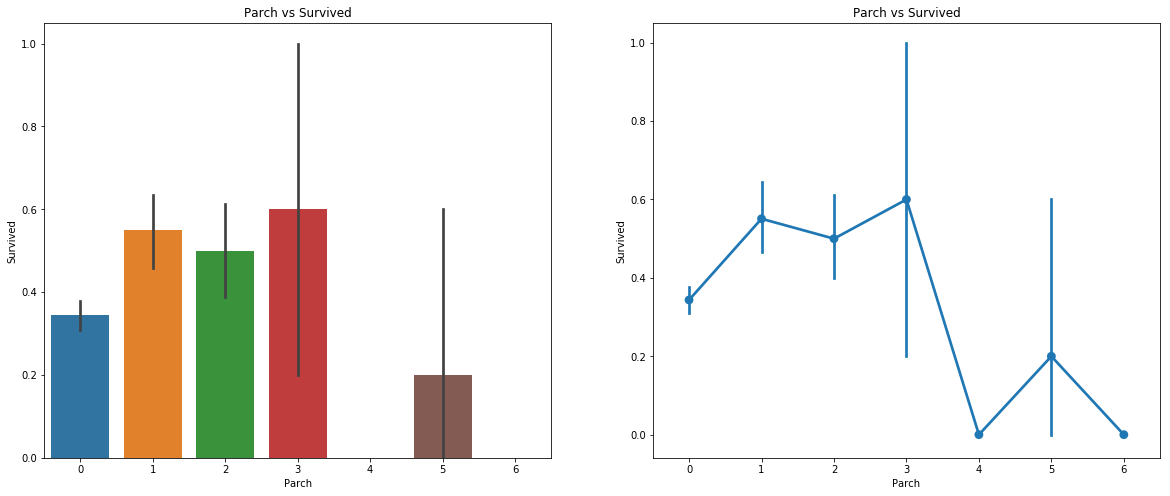

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train_data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train_data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [67]:
#Fare
print('Highest Fare was:',train_data['Fare'].max())
print('Lowest Fare was:',train_data['Fare'].min())
print('Average Fare was:',train_data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


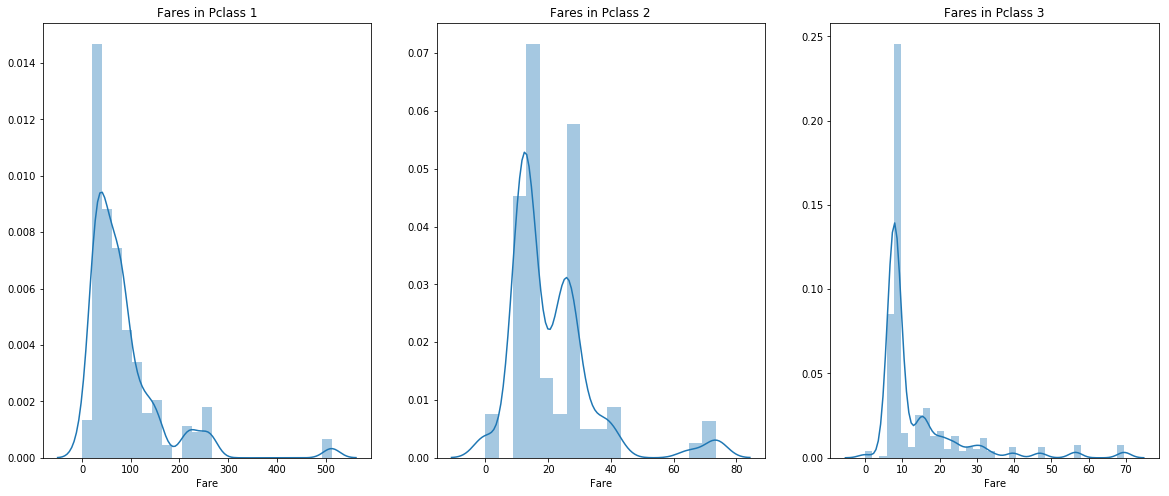

In [70]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_data[train_data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_data[train_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

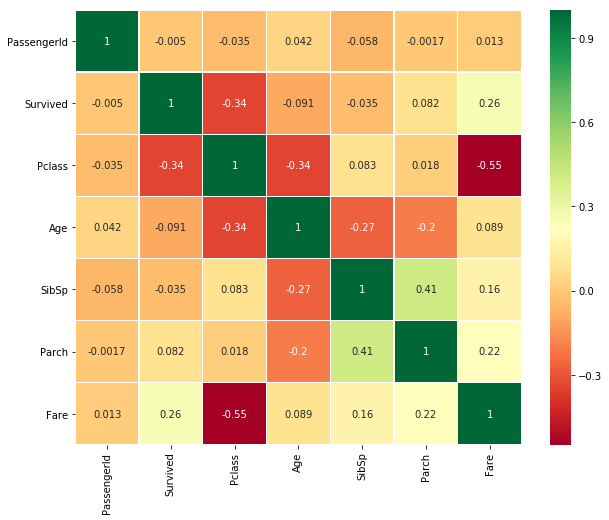

In [71]:
#Correllation between the Features
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()